In [89]:
import networkx as nx
import numpy as np
from jaccard_implementation import jaccard_similarity_communities_optimal
from newman_greedy import newman_greedy_distance
from cluster_graphs import generate_full_cluster_graph_same_size
import matplotlib.pyplot as plt
from color_communites import color_communities

In [90]:
times_to_average = 1

cluster_values = np.linspace(3,16,times_to_average).astype(int)
cluster_node_values = np.linspace(1,50,50).astype(int)
gamma_values = np.linspace(0.0001,0.1,100)

optimal_gammas = np.zeros(50)

for clusters in cluster_values:
    for i, cluster_nodes in enumerate(cluster_node_values):
        optimal_gamma = None 
        max_accuracy = 0
        for gamma in gamma_values:
            graph = generate_full_cluster_graph_same_size(clusters, cluster_nodes)
            actual_communities = [[k * cluster_nodes + i for i in range(cluster_nodes)] for k in range(clusters)]
            calculated_communities = newman_greedy_distance(graph, gamma)
            accuracy = jaccard_similarity_communities_optimal(actual_communities, calculated_communities)
            if accuracy > max_accuracy:
                max_accuracy = accuracy
                optimal_gamma = gamma
        optimal_gammas[i] += optimal_gamma

optimal_gammas = optimal_gammas / times_to_average


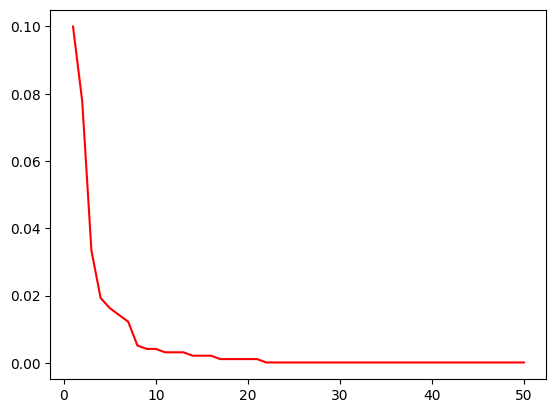

In [91]:
plt.plot(cluster_node_values, optimal_gammas, c='red')
plt.savefig('./plots/gamma_wrt_cluster_nodes.pdf')



In [92]:
# exponential decay optimisation: find c,l,k so that c*exp(-l* gamma) + k best describes the optimal_gammas array

from scipy.optimize import curve_fit

def model(x,c,l):
    return c*np.exp(-l*x)

params, covariance = curve_fit(model, cluster_node_values, optimal_gammas, p0=[1,1])
c_opt, l_opt = params

print(c_opt, l_opt)

0.1616558536042243 0.4500547630497226


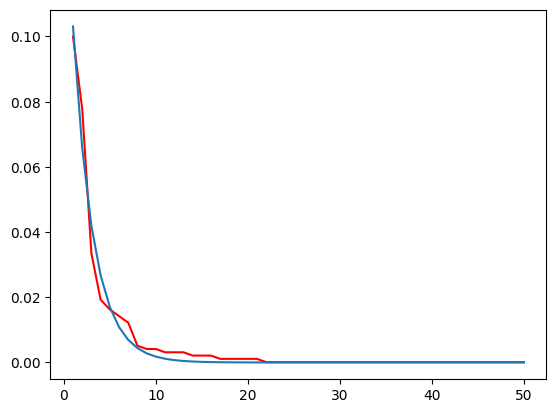

In [95]:
plt.plot(cluster_node_values, optimal_gammas, c='red')
x = np.linspace(1,50,50)
plt.plot(x, c_opt*np.exp(-l_opt*x))
plt.savefig('./plots/gammas_aproximations.pdf')